# Nearest neighbor do rozpoznawania ręcznego pisma



## 1. The MNIST dataset

`MNIST` jest klasycznym zbiorem danych w machine learning, składa się z 28x28 gray-scale obrazów ręczne pisanych cyfr. Oryginalny zbiór treningowy zawiera 60000 przykladów a zbiór testowy zawiera 10000 przykladów. W tym notebooku będziemy pracować z podzbiorem tych danych: zbiór treningowy zawiera 7500 przykładów a zbiór testowy 1000 przykladów.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import time

## Load the training set
train_data = np.load('MNIST/mnist_train_data.npy')
train_labels = np.load('MNIST/mnist_train_labels.npy')

## Load the testing set
test_data = np.load('MNIST/mnist_test_data.npy')
test_labels = np.load('MNIST/mnist_test_labels.npy')

In [2]:
## Print out their dimensions
print("Training dataset dimensions: ", np.shape(train_data))
print("Number of training labels: ", len(train_labels))
print("Testing dataset dimensions: ", np.shape(test_data))
print("Number of testing labels: ", len(test_labels))

Training dataset dimensions:  (7500, 784)
Number of training labels:  7500
Testing dataset dimensions:  (1000, 784)
Number of testing labels:  1000


In [3]:
## Compute the number of examples of each digit
train_digits, train_counts = np.unique(train_labels, return_counts=True)
print("Training set distribution:")
print(dict(zip(train_digits, train_counts)))

test_digits, test_counts = np.unique(test_labels, return_counts=True)
print("Test set distribution:")
print(dict(zip(test_digits, test_counts)))

print(type(train_digits))
print(np.shape(train_digits))

Training set distribution:
{0: 750, 1: 750, 2: 750, 3: 750, 4: 750, 5: 750, 6: 750, 7: 750, 8: 750, 9: 750}
Test set distribution:
{0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100}
<class 'numpy.ndarray'>
(10,)


## 2. Visualizing the data
Each data point is stored as 784-dimensional vector. To visualize a data point, we first reshape it to a 28x28 image.

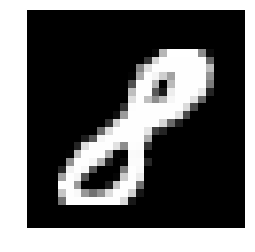

Label 8


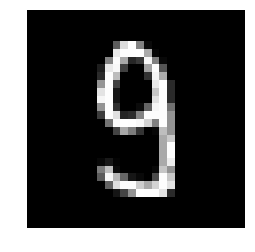

Label 9


In [5]:
## Define a function that displays a digit given its vector representation
def show_digit(x):
    plt.axis('off')
    plt.imshow(x.reshape(28,28), cmap=plt.cm.gray)
    plt.show()
    return

## Define a function that takes an index into a particular data set ("train" or "test") and displays that image.
def vis_image(index, dataset="train"):
    if(dataset=="train"): 
        show_digit(train_data[index,])
        label = train_labels[index]
    else:
        show_digit(test_data[index,])
        label = test_labels[index]
    print("Label " + str(label))
    return

## View the first data point in the training set
vis_image(300, "train")

## Now view the first data point in the test set
vis_image(300, "test")

## 3. Squared Euclidean distance ##  
(przykład formatowania w jupiterze)

Aby obliczyć nearest neighbors w naszym zbiorze danych, po pierwsze musimy mieć możliwość obliczenia dystansu pomiędzy punktami danych (wektorami). Naturalną funkcją dystansu jest  _Euclidean distance_: dla dwóch wektorów $x, y \in \mathbb{R}^d$, ich dystans Euklidesowy jest zdefiniowany jako 
$$\|x - y\| = \sqrt{\sum_{i=1}^d (x_i - y_i)^2}.$$
Często omijamy pierwiastek kwadratowy i obliczamy po prostu  _squared Euclidean distance_:
$$\|x - y\|^2 = \sum_{i=1}^d (x_i - y_i)^2.$$
Oba sposoby obliczeń mają taki sam sens dla nearest neighbor 


## 4. Wykorzystanie sklearn do klasyfikacji K-Nearest Neighbors##  

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)

In [8]:
knn.fit(train_data,train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [9]:
pred=knn.predict(test_data)

In [10]:
print(pred[0:100])
print()
print(test_labels[0:100])

[0 2 6 5 9 6 0 7 1 1 4 6 7 7 5 7 7 1 0 0 0 0 0 5 3 6 4 9 5 4 7 7 5 2 6 5 9
 8 7 3 2 4 3 6 3 2 2 7 1 1 5 1 0 6 4 5 9 4 6 4 3 5 0 6 1 2 9 3 3 6 1 2 0 7
 6 3 7 1 3 7 4 7 4 2 8 4 1 5 7 5 3 4 5 2 7 0 0 5 7 8]

[0 2 6 5 9 6 0 7 1 1 4 6 7 7 5 7 7 7 0 0 0 0 0 5 3 6 4 9 5 4 7 7 5 2 6 8 9
 8 7 3 2 4 3 6 3 2 2 2 1 1 5 1 0 6 4 5 9 4 6 4 3 5 0 6 1 2 9 3 3 6 1 2 0 7
 6 3 7 1 3 7 4 7 4 2 8 4 1 5 8 5 3 4 5 2 7 0 0 5 7 8]


### Ewaluacja

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
print(confusion_matrix(test_labels,pred))   # rows- true, columns - predicted

[[100   0   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  0   1  98   0   0   0   0   1   0   0]
 [  0   0   2  94   1   3   0   0   0   0]
 [  0   1   0   0  97   0   1   0   0   1]
 [  1   0   0   0   0  96   2   0   0   1]
 [  1   0   0   0   0   0  99   0   0   0]
 [  0   6   0   0   1   0   0  91   0   2]
 [  4   0   2   2   3   2   0   1  85   1]
 [  1   2   1   2   2   1   0   3   0  88]]


In [13]:
print(classification_report(test_labels,pred))    # mean recall = macro avg

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       100
           1       0.91      1.00      0.95       100
           2       0.95      0.98      0.97       100
           3       0.96      0.94      0.95       100
           4       0.93      0.97      0.95       100
           5       0.94      0.96      0.95       100
           6       0.97      0.99      0.98       100
           7       0.95      0.91      0.93       100
           8       1.00      0.85      0.92       100
           9       0.95      0.88      0.91       100

   micro avg       0.95      0.95      0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



### Wyznaczenie optymalnej wartości k

In [14]:
error_rate = []


for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_data,train_labels)
    pred_i = knn.predict(test_data)
    error_rate.append(np.mean(pred_i != test_labels))

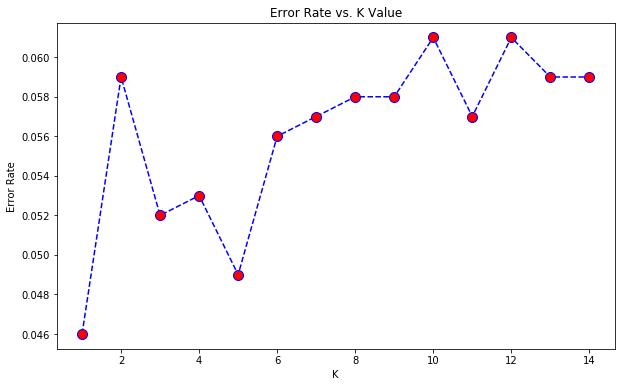

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');